In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [2]:
logging.getLogger().setLevel(logging.CRITICAL)

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

In [3]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

plt.rcParams['lines.linewidth'] = 2.5

In [55]:
asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49,
            'Cu_2p' : 5.321, 'Cl_2p' : 0.891})

In [8]:
Na = 6.023e23
M = 529
R = 7.33e-8 # cm
rho = M/Na/(4*np.pi/3*R**3)
rho

0.5324051841398443

In [9]:
V = 4*np.pi/3*R**3 #cm^3
V

1.6496831299488353e-21

# Analysis experiments on Cu from september 2020

## Read processed experiments

In [6]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/**/*.xy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if ('/proc' in f) and ('BaCl' not in f): # ('2020_10_19' not in f) and
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_09_22_Cu/proc/20200922_1-Cu_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_09_22_Cu/proc/20200923_1-Cu_FBI_subl_20min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_08_Cu/proc/20201013_2-Cu_FBI_subl_20min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_08_Cu/proc/20201013_2-Cu_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_14_Cu/proc/20201014_3-Cu_FBI_subl_25min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_14_Cu/proc/20201014_3-Cu_FBI_subl_50min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_14_Cu/proc/20201014_3-Cu_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_16_Cu/proc/20201016_4-Cu_FBI_subl_5min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_16_Cu/proc/20201016_4-Cu_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/

In [25]:
proc_exps = [read_processed_xp(f) for f in files]

In [19]:
fbi_exps = [xp for xp in proc_exps if ('clean' not in xp.name) ]
# fbi_exps.pop(4);
[xp.name for xp in fbi_exps]

['1-FBI 20min',
 '2-FBI 20min',
 '3-FBI 25min',
 '3-FBI 50min',
 '4-FBI 5min',
 '5-FBI 11min',
 '5-FBI 6min',
 '5-FBI 16min',
 '5-FBI 21min',
 '6-FBI 15min']

In [17]:
proc_exps[5].date, proc_exps[5].name

('2020.10.14', '3-FBI 50min')

## Show individual plots

In [18]:
regions = proc_exps[0].dfx.columns.levels[0].values
regions= ['N_1s', 'C_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Cu_2p']

In [92]:
def plot_xp_regions(experiments : list, regions : list, colors : list = [], ncols: int = 3):
    """Subplots all regions of a list of experiments (unnormalised)"""
    rows = int(np.ceil(len(regions) / ncols))

    fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
    fig.add_subplot(111, frameon=False, xticks=[], yticks=[])  # Used for common xlabel and ylabel

    for i,r in enumerate(regions):
        for c,xp in enumerate(experiments):
            j, k = i//ncols, i%ncols

            if i == len(regions) - 1:   # Set labels from last region
                lb = xp.name
                    
            else:
                lb='__nolabel__'

            try:
                li = plot_region(xp, r, ax=ax[j][k], lb=lb)
                ax[j][k].legend()
                ax[j][k].invert_xaxis()
            except KeyError:    # Auto-exclude regions not recorded for a particular experiment
                pass
            
            ax[j][k].set_title(r)
            ax[j][k].set_yticks([])
#
        if len(experiments)%2 == 0:
            ax[j][k].invert_xaxis()
    plt.xlabel('\nEnergy [eV]', ha='center')
    plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)
    return ax


[(-0.01, 10)]

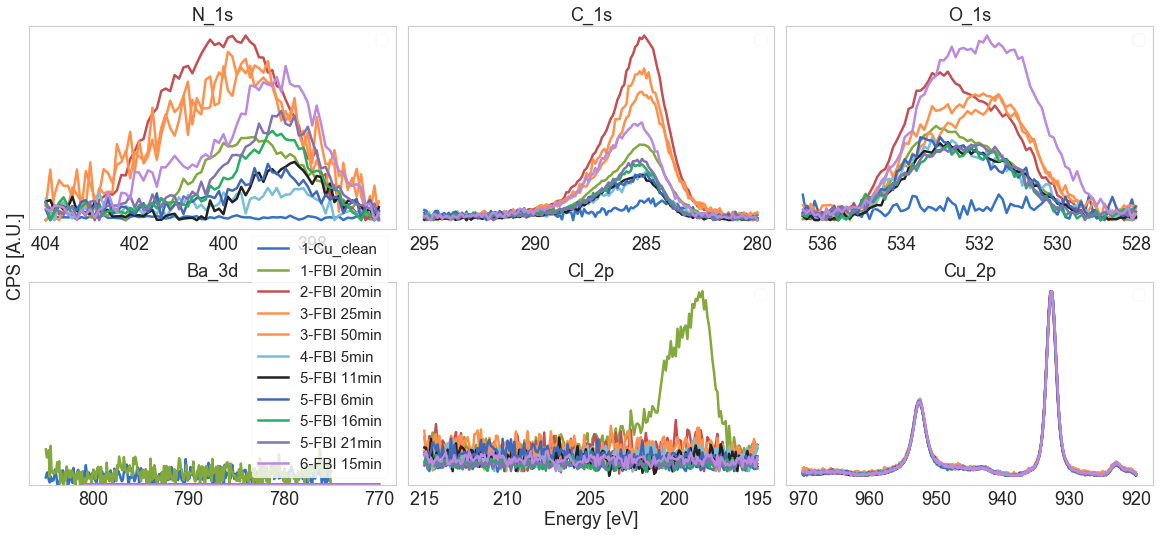

In [68]:
ax = plot_xp_regions([proc_exps[0]] + fbi_exps, regions, ncols=3)
ax[1][0].set(ylim=(-0.01, 10))

In [47]:
fbi_repr = [xp for xp in fbi_exps if 'FBI 2' in xp.name]

In [48]:
[xp.name for xp in fbi_repr]

['1-FBI 20min', '2-FBI 20min', '3-FBI 25min', '5-FBI 21min']

In [49]:
fbi_repr[0].color = 'g'
fbi_repr[3].color = 'm'
fbi_repr[2].color = 'y'

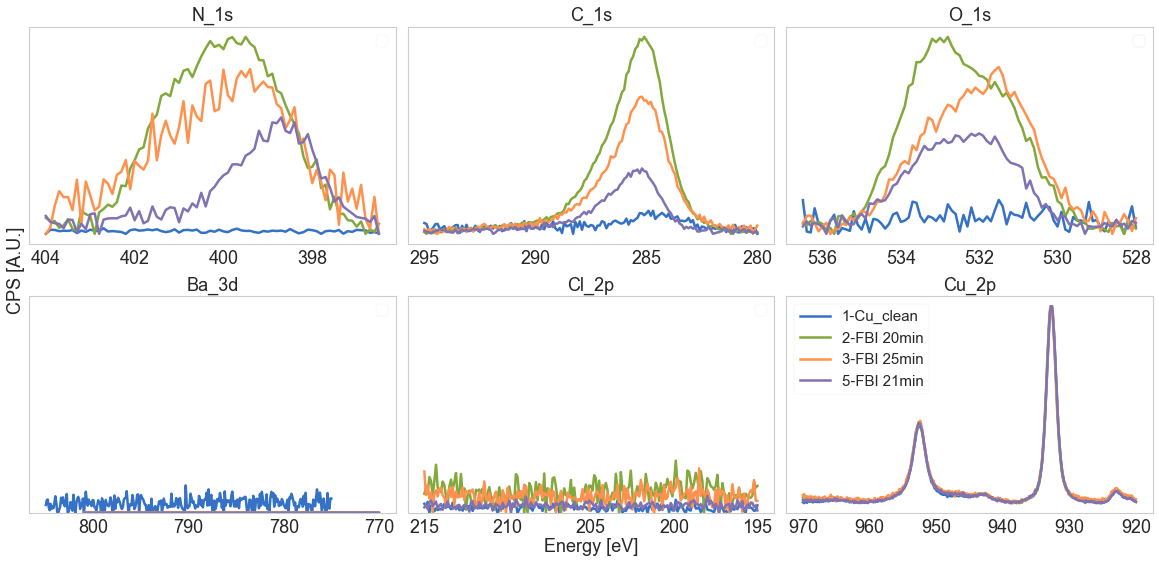

In [93]:
ax = plot_xp_regions([proc_exps[0]] + fbi_repr[1:], regions, ncols=3)
ax[1][0].set(ylim=(-0.01, 10))
ax[1][1].set(ylim=(-0.01, 500))
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/FBI_reproducibility.png', dpi=200)

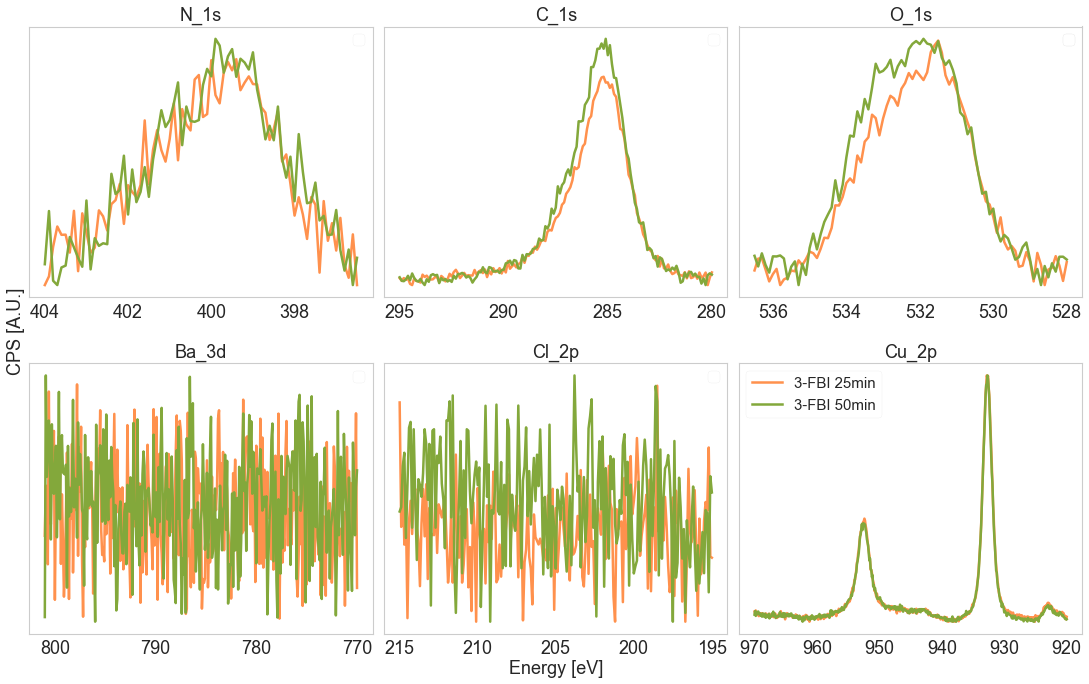

In [94]:
plot_xp_regions(fbi_exps[2:4], regions, ncols=3)
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(15)

In [58]:
asf

{'C_1s': 0.296,
 'O_1s': 0.711,
 'N_1s': 0.477,
 'Ba_3d': 7.49,
 'Cu_2p': 5.321,
 'Cl_2p': 0.891}

### Normalized spectra

In [31]:
def plot_normal_regions(experiments : list, regions : list):
    """Subplots all normalized regions of a list of experiments"""
    rows = int(np.ceil(len(regions) / 3))
    cols = 3
    fig, ax = plt.subplots(rows, cols, figsize=(16, 8))
    for i,r in enumerate(regions):
        for xp in experiments:
            xp_norm = normalise_dfx(xp, inplace=False)
            j, k = i//3, i%3
            if i == len(experiments):   # Set labels from last region
                plot_region(xp_norm, r, ax=ax[j][k], lb=xp_norm.name)
                ax[j][k].set_title('Au_4f')
            else:
                plot_region(xp_norm, r, ax=ax[j][k], lb='__nolabel__')
                ax[j][k].set_title(r)
            cosmetics_plot(ax=ax[j][k], leg = False);
        if len(regions)%2 == 0:
            ax[j][k].invert_xaxis()
    plt.tight_layout()
    fig.legend()

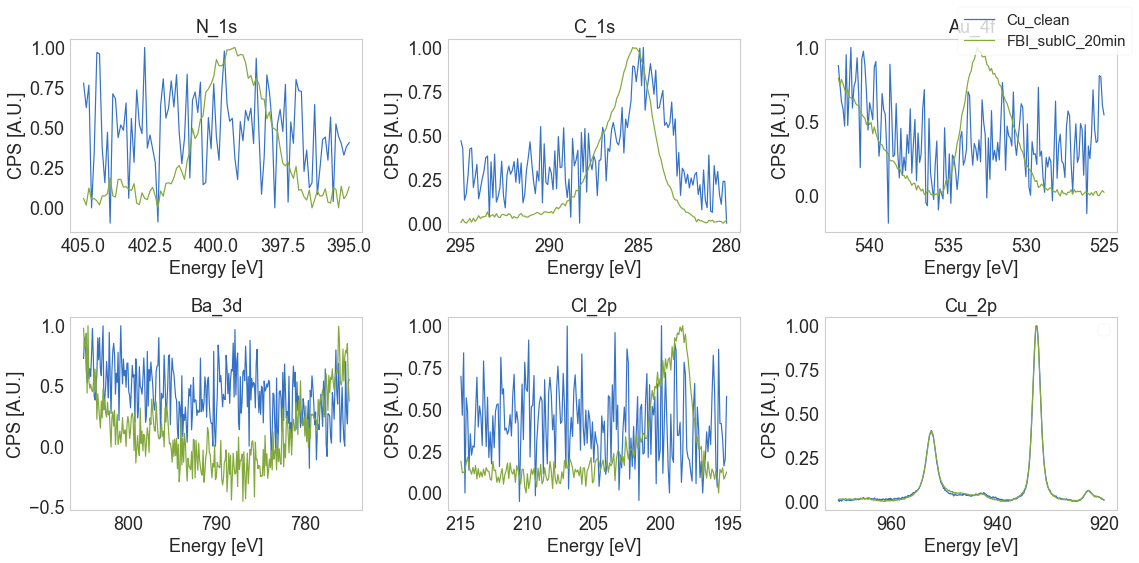

In [32]:
plot_normal_regions(proc_exps[:2], regions)

## Integrate areas 

### C 1s

[2002.0767165004602,
 4528.450694499383,
 10426.517797240962,
 4125.9392723084275,
 7777.2751835288345,
 8778.277774666889,
 3385.6801835725564,
 3108.252859247222,
 3254.0643174548686,
 2781.311763631114,
 3234.548859610384,
 2100.75491883576,
 3573.458152775842,
 3594.9849740291374,
 6136.008153285917,
 431.1540505922503]

<Figure size 460.8x403.2 with 0 Axes>

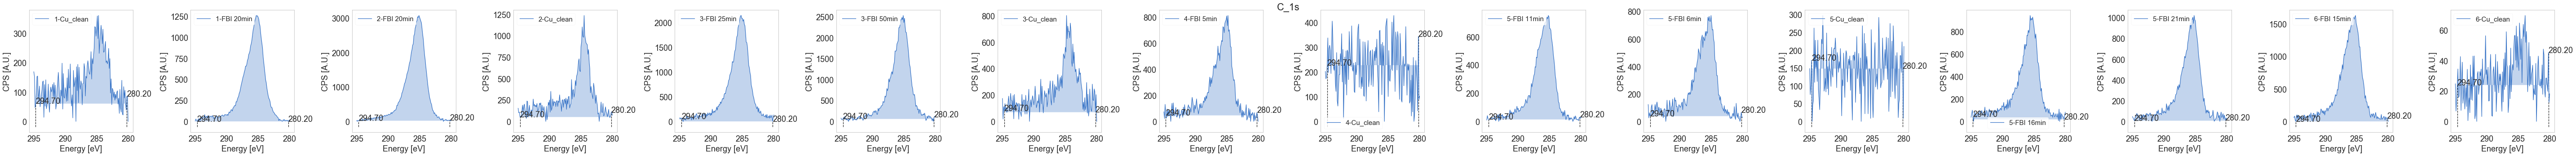

In [58]:
region = 'C_1s'
integrateRegions(proc_exps, region, indRef=1, asf=asf)

### O 1s

[684.7965165574403,
 2480.3984809412036,
 4016.7424294777743,
 1742.0829957402627,
 3341.3772140477517,
 3751.6864779611274,
 1358.0078980712487,
 2272.0306769180397,
 1131.2088063502529,
 2100.1551168957226,
 2310.7063596732987,
 850.4216658231421,
 2065.8445901687264,
 2178.1686640217536,
 5439.79499610978,
 638.3117802246192]

<Figure size 460.8x403.2 with 0 Axes>

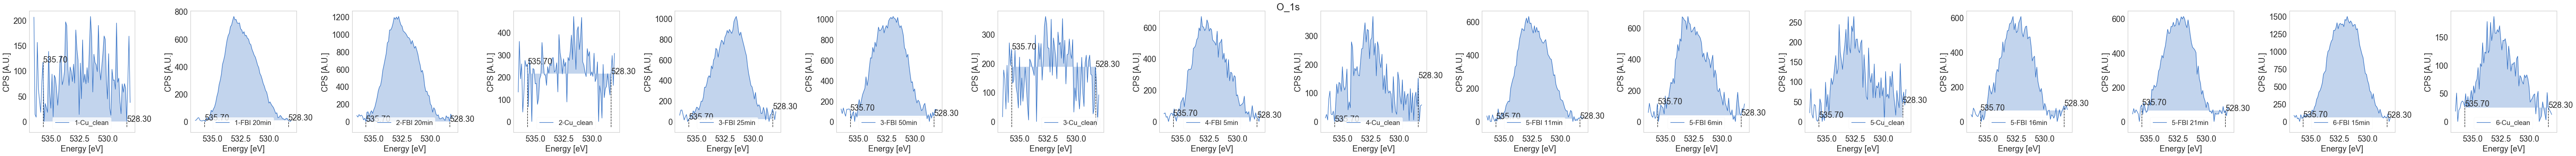

In [60]:
region = 'O_1s'
integrateRegions(proc_exps, region, indRef=2, asf=asf)

#### Correct for bg substrate abundance

In [61]:
for xp in proc_exps[1:14]:
    uncorr_area = xp.area['O_1s']
    xp.area.update({'O_1s': uncorr_area - proc_exps[0].area['O_1s']})

uncorr_area = proc_exps[14].area['O_1s']
proc_exps[14].area.update({'O_1s': uncorr_area - proc_exps[15].area['O_1s']})

In [62]:
[xp.area['O_1s'] for xp in proc_exps]

[963.1455929077923,
 2525.4598655186546,
 4686.281171477263,
 1487.0414615792156,
 3736.4004184111277,
 4313.487990722486,
 946.8514507929796,
 2232.3968500149076,
 627.8653864877814,
 1990.6590722057417,
 2286.7930282923467,
 232.94676408678185,
 1942.4023538836655,
 2100.3827671790623,
 6753.140950612041,
 897.7662169122633]

### N 1s

[38.79586305691808,
 512.8932816754148,
 1375.0284425354591,
 85.01208078376415,
 1161.5706588970613,
 1291.660024927913,
 73.51034335394031,
 339.8614858309299,
 83.34505197143415,
 304.28231172483714,
 365.5147870541674,
 87.05883514225071,
 590.4520602615377,
 627.4542750291938,
 1027.8696524789466,
 33.2375281544933]

<Figure size 460.8x403.2 with 0 Axes>

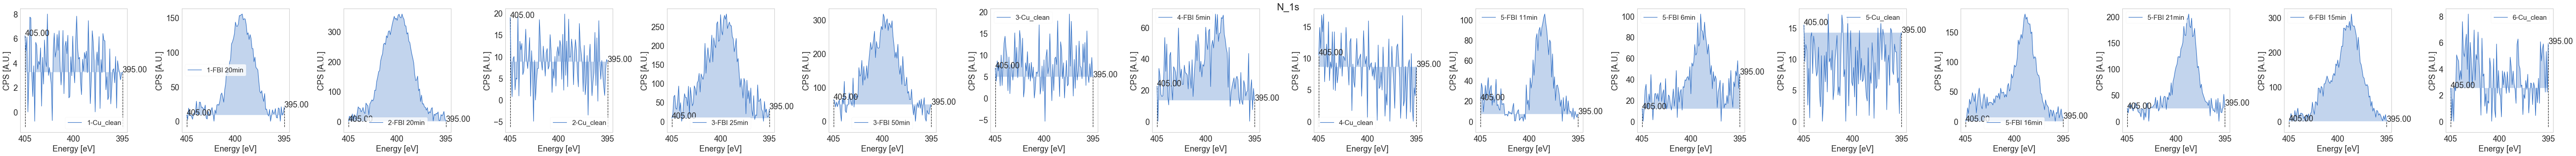

In [63]:
region = 'N_1s'
integrateRegions(proc_exps, region, indRef=2, asf=asf)

### Ba 3d

'Ba_3d' region does not exist in 5-Cu_clean


[7.159451602775418,
 8.387332605335246,
 0.2333313602204587,
 0.1073721907085114,
 0.16230782170668648,
 0.17559730106910776,
 0.11376359984919554,
 0.11412400490914354,
 0.11962593773483332,
 0.16178171271453412,
 0.1383754934963777,
 0.07627305731200973,
 0.07330252654127851,
 0.09266070182593272,
 0.06645068699522179]

<Figure size 460.8x403.2 with 0 Axes>

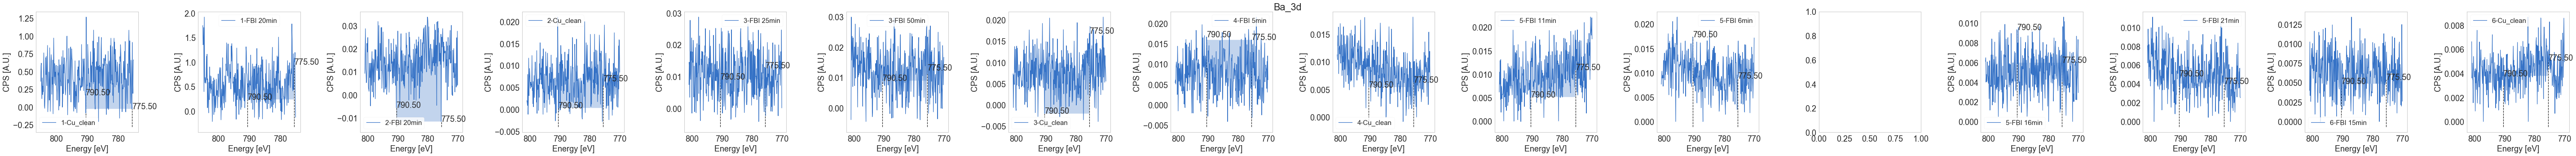

In [64]:
region = 'Ba_3d'
integrateRegions(proc_exps, region, indRef=2, asf=asf)

### Cl 2p

'Cl_2p' region does not exist in 5-Cu_clean


[60.50405695541335,
 1149.0490759494273,
 305.51738096740434,
 145.30832581578622,
 221.92245387530897,
 274.76637173097,
 186.84909889673008,
 186.77422531813474,
 209.07029659288344,
 169.09080488736788,
 165.63049829193795,
 92.4775029469664,
 88.59683476658046,
 140.1647779284893,
 85.805573889626]

<Figure size 460.8x403.2 with 0 Axes>

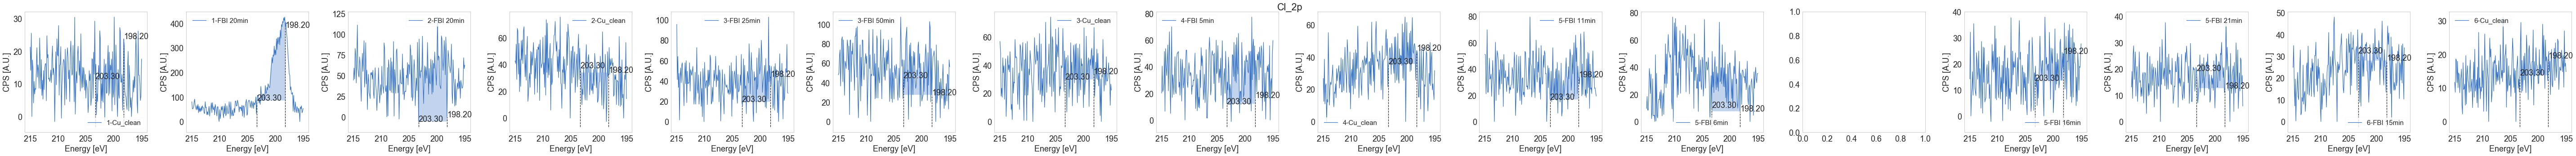

In [65]:
region = 'Cl_2p'
integrateRegions(proc_exps, region, indRef=2, asf=asf)

In [67]:
xp.area

{'C_1s': 12145.219506855196,
 'O_1s': 2100.3827671790623,
 'N_1s': 1315.4177673568006,
 'Ba_3d': 0.009786719164389654,
 'Cl_2p': 99.43528032163913,
 'Cu_2p': 63344.765030246854}

### Cu 2p

[334783.8038293357,
 333700.06033662264,
 341344.0813694794,
 336935.69504488935,
 357667.24623106205,
 351235.1499298023,
 336454.2168855278,
 345239.7690705367,
 314334.7663822264,
 330805.97032875643,
 339700.7446337192,
 311192.2540250939,
 339928.20176999073,
 337057.4947259435,
 340571.27288109134,
 328077.8442506449]

<Figure size 460.8x403.2 with 0 Axes>

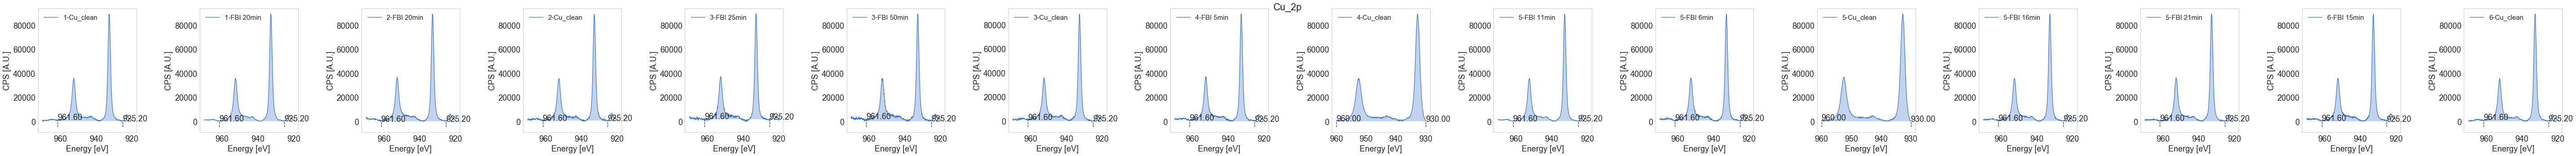

In [66]:
region = 'Cu_2p'
integrateRegions(proc_exps, region, indRef=2, asf=asf)

## Stoichiometry 

In [68]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Cu_2p'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'N_1s'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cu_/N_	
1-Cu_clean	0.08	 83.16	 7.02	 0.01	 773.58	 
1-FBI 20min	0.43	 14.23	 6.06	 0.00	 58.32	 
2-FBI 20min	0.62	 12.22	 7.52	 0.00	 22.25	 
2-Cu_clean	0.12	 78.21	 9.37	 0.00	 355.30	 
3-FBI 25min	0.65	 10.79	 7.03	 0.00	 27.60	 
3-FBI 50min	0.63	 10.95	 6.88	 0.00	 24.38	 
3-Cu_clean	0.16	 74.22	 12.08	 0.00	 410.30	 
4-FBI 5min	0.32	 14.74	 4.70	 0.00	 91.06	 
4-Cu_clean	0.28	 62.92	 17.51	 0.00	 338.09	 
5-FBI 11min	0.32	 14.73	 4.72	 0.00	 97.46	 
5-FBI 6min	0.34	 14.26	 4.78	 0.00	 83.31	 
5-Cu_clean	0.78	 38.89	 30.47	 0.00	 320.44	 
5-FBI 16min	0.64	 9.75	 6.22	 0.00	 51.61	 
5-FBI 21min	0.63	 9.23	 5.78	 0.00	 48.16	 
6-FBI 15min	0.32	 9.62	 3.07	 0.00	 29.70	 
6-Cu_clean	0.08	 20.90	 1.62	 0.00	 884.86	 


In [48]:
print('Nominal')
print('N/O \t C/N \t \t C/O \t O/Cl (ClO4)')
print(3/5, '\t', '%.3f'%(31/3), '\t', '%.3f' %(31/5), '\t %.3f' %(4/1) )

Nominal
N/O 	 C/N 	 	 C/O 	 O/Cl (ClO4)
0.6 	 10.333 	 6.200 	 4.000


In [69]:
fbi_exps = [xp for xp in proc_exps if ('clean' not in xp.name) ]
# fbi_exps.pop(4);
[xp.name for xp in fbi_exps]

['1-FBI 20min',
 '2-FBI 20min',
 '3-FBI 25min',
 '3-FBI 50min',
 '4-FBI 5min',
 '5-FBI 11min',
 '5-FBI 6min',
 '5-FBI 16min',
 '5-FBI 21min',
 '6-FBI 15min']

In [71]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Cu_2p'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'N_1s'))
make_stoichometry_table(fbi_exps,  num=num, denom=denom)

Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cu_/N_	
1-FBI 20min	0.43	 14.23	 6.06	 0.00	 58.32	 
2-FBI 20min	0.62	 12.22	 7.52	 0.00	 22.25	 
3-FBI 25min	0.65	 10.79	 7.03	 0.00	 27.60	 
3-FBI 50min	0.63	 10.95	 6.88	 0.00	 24.38	 
4-FBI 5min	0.32	 14.74	 4.70	 0.00	 91.06	 
5-FBI 11min	0.32	 14.73	 4.72	 0.00	 97.46	 
5-FBI 6min	0.34	 14.26	 4.78	 0.00	 83.31	 
5-FBI 16min	0.64	 9.75	 6.22	 0.00	 51.61	 
5-FBI 21min	0.63	 9.23	 5.78	 0.00	 48.16	 
6-FBI 15min	0.32	 9.62	 3.07	 0.00	 29.70	 


In [79]:
1/59.82

0.01671681711802073

# Compare to FBI-Ba set 

In [71]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/**/*.xy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if (' ' not in f) and ('/proc' in f) and ('BaCl'in f):
        files_new.append(f)
        
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_09_22_Cu/proc/20200928_1-Cu_FBI_BaCl2_subl_20min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_19_Cu/proc/20201020_5-Cu_FBI_BaCl2_subl_10min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_21_Cu/proc/20201021_6-Cu_FBI_BaCl2_subl_20min.xy']

In [72]:
proc_ba = [read_processed_xp(f, ls='dashed') for f in files]
colors = ['b', 'r', 'y']
for xp, c in zip(proc_ba, colors):
    xp.color = c

## Show individual spectra

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2450c5c0>,
      dtype=object)

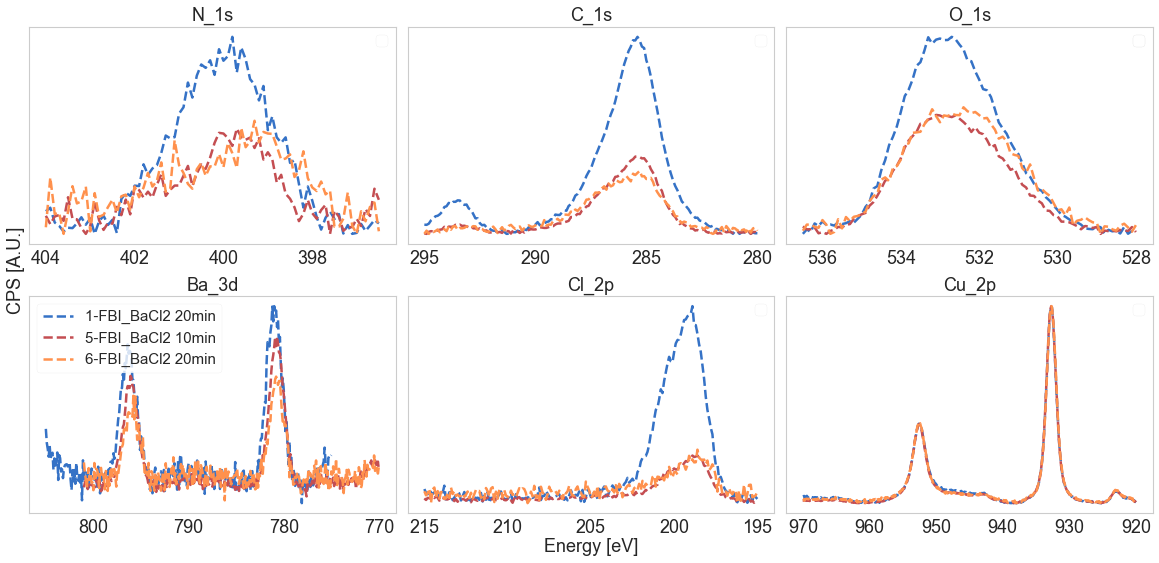

In [73]:
plot_xp_regions(proc_ba, regions, ncols=3);

## Compare FBI to FBI-Ba

#### From 23th/28th sept

In [76]:
fbi_exps[0].date, proc_ba[0].date

('2020.09.23', '2020.09.28')

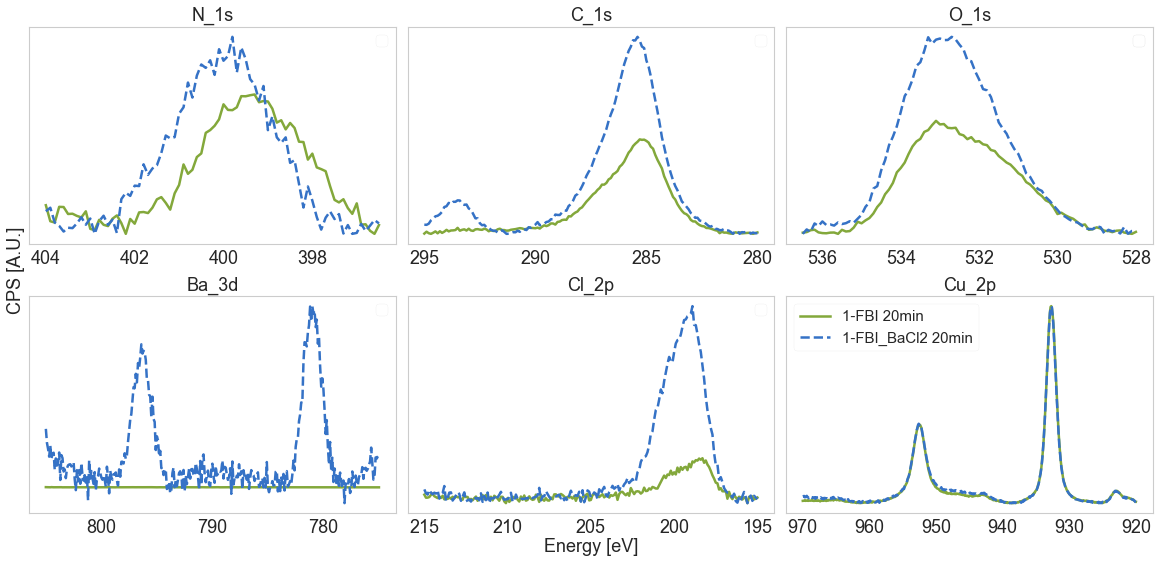

In [97]:
plot_xp_regions([fbi_exps[0], proc_ba[0]], regions, ncols=3, );
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/sample1_beforeafterBa.png', dpi=200)

#### From 20th october

In [83]:
fbi_exps[8].date, proc_ba[1].date

('2020.10.20', '2020.10.20')

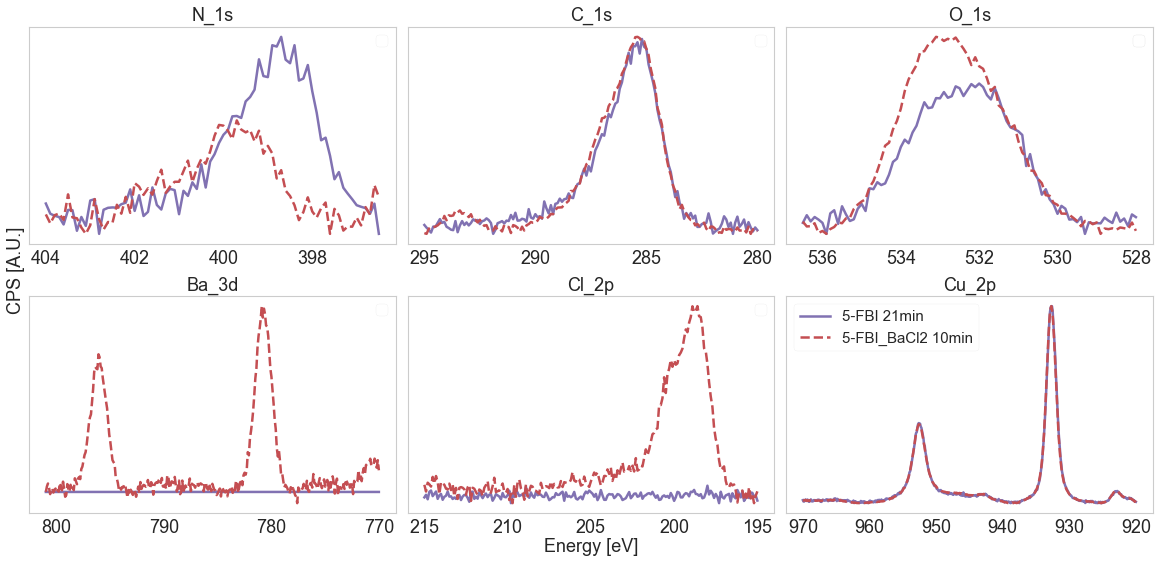

In [98]:
plot_xp_regions([fbi_exps[8], proc_ba[1]], regions, ncols=3, );
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/sample5_beforeafterBa.png', dpi=200)

#### From 21st/22nd oct

In [85]:
fbi_exps[9].date, proc_ba[2].date

('2020.10.21', '2020.10.21')

In [90]:
fbi_exps[9].color = 'k'

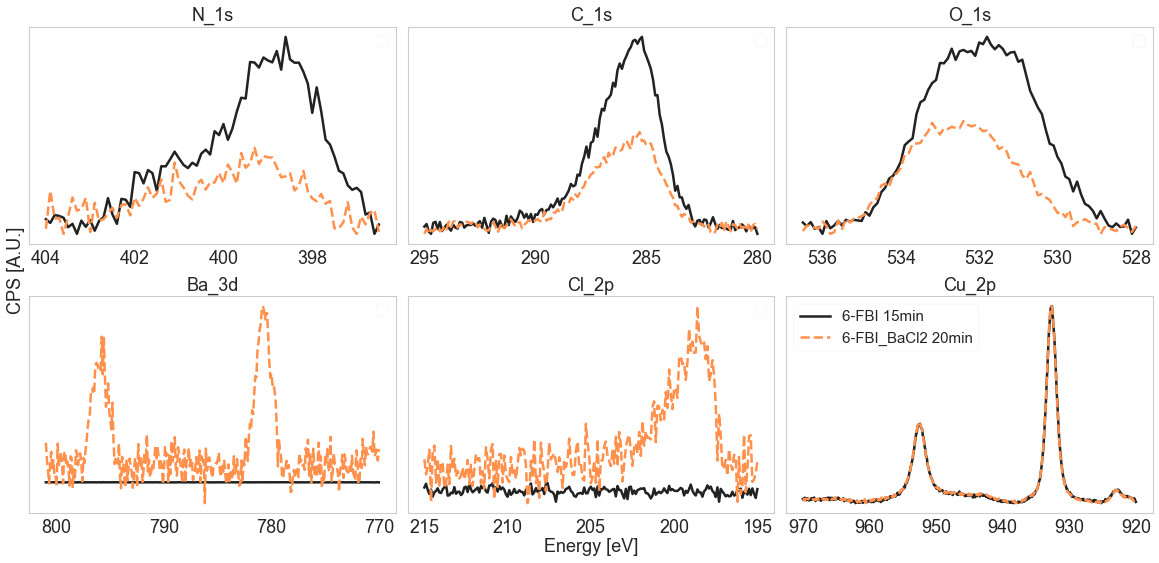

In [99]:
plot_xp_regions([fbi_exps[9], proc_ba[2]], regions, ncols=3, );
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/sample6_beforeafterBa.png', dpi=200)

## Integrate areas 

In [186]:
for xp in proc_ba:
    xp.area = {}

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:61: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[8935.868169312378, 3621.9329193084213, 3607.9761550605044]

<Figure size 460.8x403.2 with 0 Axes>

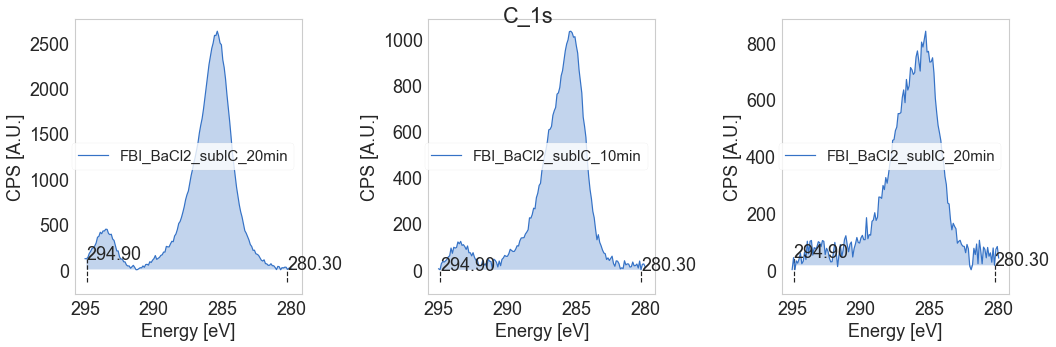

In [187]:
region = 'C_1s'
integrateRegions(proc_ba, region, indRef=1, asf=asf)

### O 1s

[4119.26768608318, 2674.3507502257544, 3067.6967323412887]

<Figure size 460.8x403.2 with 0 Axes>

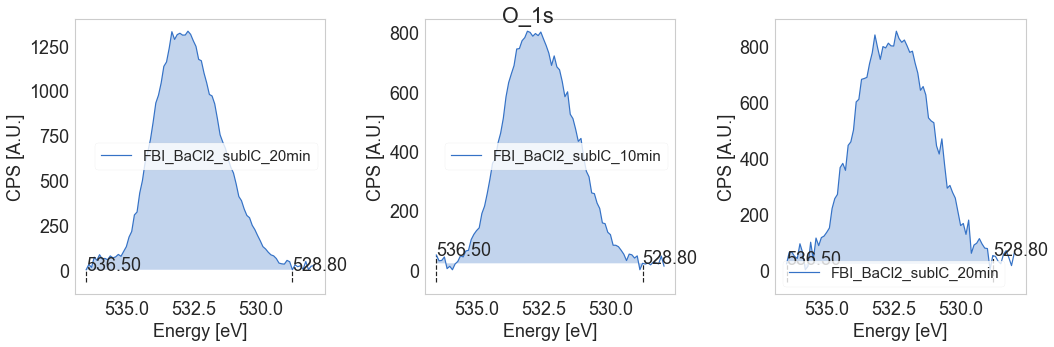

In [188]:
region = 'O_1s'
integrateRegions(proc_ba, region, indRef=0, asf=asf)

### N 1s

[577.515032129588, 361.5670033612271, 510.9443826783183]

<Figure size 460.8x403.2 with 0 Axes>

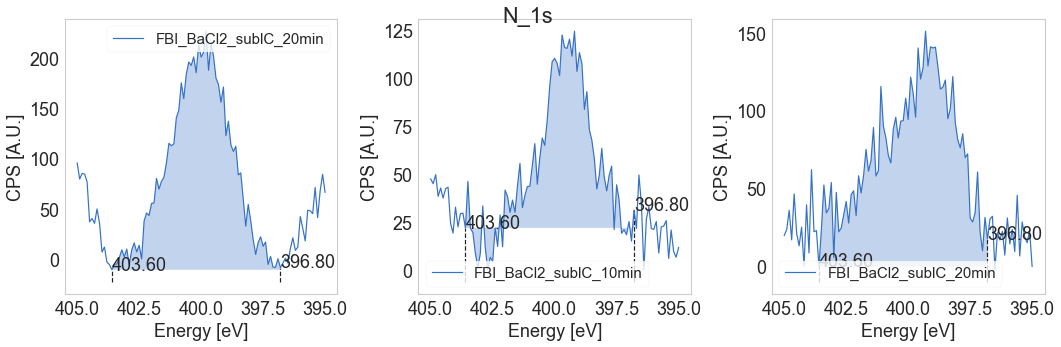

In [189]:
region = 'N_1s'
integrateRegions(proc_ba, region, indRef=0, asf=asf)

### Ba 3d

[8313.790314050102, 5641.200477753713, 5479.191153405294]

<Figure size 460.8x403.2 with 0 Axes>

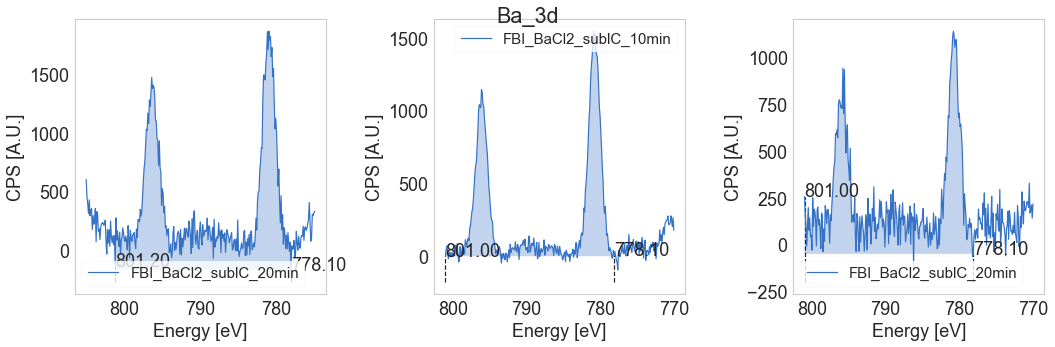

In [190]:
region = 'Ba_3d'
integrateRegions(proc_ba, region, indRef=0, asf=asf)

### Cl 2p

[6305.85732082938, 1813.641602515992, 2486.9968920608876]

<Figure size 460.8x403.2 with 0 Axes>

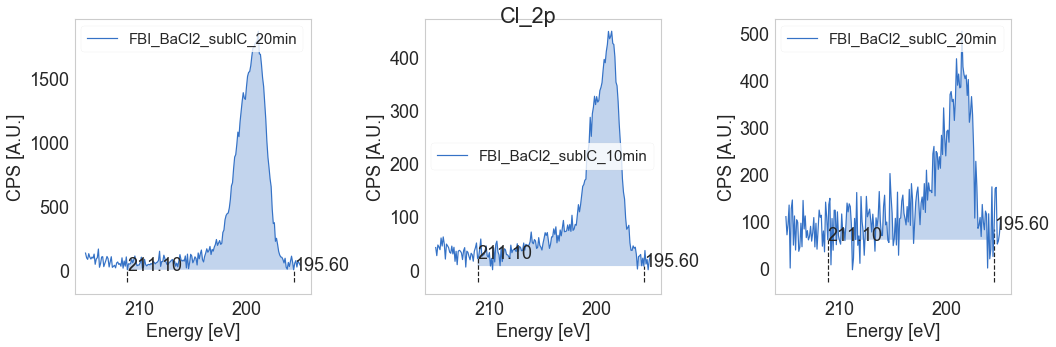

In [191]:
region = 'Cl_2p'
integrateRegions(proc_ba, region, indRef=0, asf=asf)

In [192]:
xp.area

{'C_1s': 12189.108631961164,
 'O_1s': 4314.622689650195,
 'N_1s': 1071.1622278371453,
 'Ba_3d': 731.5341993865546,
 'Cl_2p': 2791.2423030986392}

### Cu 2p

[345170.4462182479, 334384.0270027256, 347514.30978440336]

<Figure size 460.8x403.2 with 0 Axes>

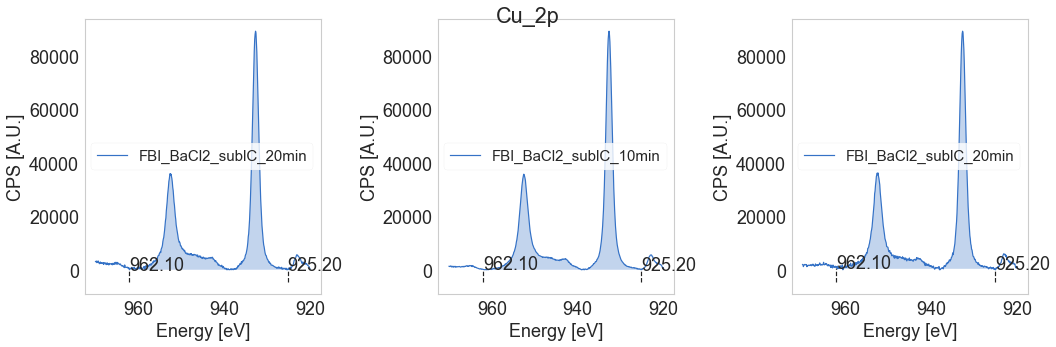

In [193]:
region = 'Cu_2p'
integrateRegions(proc_ba, region, indRef=0, asf=asf)

## Stoichiometry 

In [194]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Cu_2p'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'N_1s'))
make_stoichometry_table(proc_ba,  num=num, denom=denom)

Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cu_/N_	
FBI_BaCl2_sublC_20min	0.21	 24.93	 5.21	 0.92	 53.58	 
FBI_BaCl2_sublC_10min	0.20	 16.14	 3.25	 0.99	 82.91	 
FBI_BaCl2_sublC_20min	0.25	 11.38	 2.83	 0.68	 60.97	 
